In [70]:
import numpy as np
import pandas as pd 
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
train = '/Users/mac/Desktop/AH.csv'
df = pd.read_csv(train)
df.head()

,Control,P1,P2,P3,P4
0,0.657,0.677,0.672,0.683,0.684
1,0.580,0.610,0.598,0.616,0.624
2,0.530,0.553,0.540,0.574,0.540
3,0.473,0.498,0.490,0.497,0.478
4,0.381,0.405,0.402,0.396,0.406


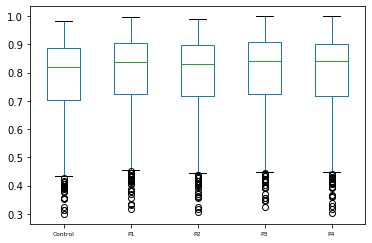

In [72]:
df.boxplot(grid = False)
import matplotlib.pyplot as plt
plt.tick_params(axis='x', labelsize=6)
plt.show()

In [73]:
df_melt = df.melt()
df_melt.head()

,variable,value
0,Control,0.657
1,Control,0.580
2,Control,0.530
3,Control,0.473
4,Control,0.381


In [74]:
df_melt.columns = ['Point','RH']
df_melt.head()

,Point,RH
0,Control,0.657
1,Control,0.580
2,Control,0.530
3,Control,0.473
4,Control,0.381


<AxesSubplot:xlabel='Point', ylabel='RH'>

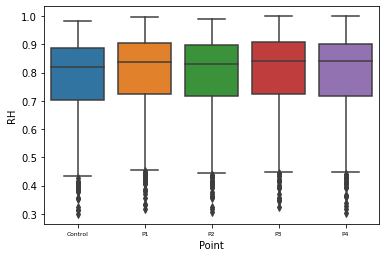

In [75]:
import seaborn as sns
plt.tick_params(axis='x', labelsize=6)
sns.boxplot(x='Point',y='RH',data = df_melt)

In [76]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('RH~C(Point)',data=df_melt).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

             sum_sq      df         F    PR(>F)
C(Point)   0.193226     4.0  2.107646  0.077329
Residual  62.455910  2725.0       NaN       NaN


In [78]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df_melt['RH'],df_melt['Point'])
tukey_result = mc.tukeyhsd(alpha = 0.5)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
Control     P1   0.0191 0.2291  0.0044 0.0337   True
Control     P2   0.0105 0.7562 -0.0041 0.0251  False
Control     P3   0.0247 0.0545  0.0101 0.0393   True
Control     P4   0.0162 0.3926  0.0016 0.0308   True
     P1     P2  -0.0086  0.874 -0.0232  0.006  False
     P1     P3   0.0057    0.9  -0.009 0.0203  False
     P1     P4  -0.0028    0.9 -0.0175 0.0118  False
     P2     P3   0.0142 0.5231 -0.0004 0.0289  False
     P2     P4   0.0057    0.9 -0.0089 0.0204  False
     P3     P4  -0.0085 0.8785 -0.0231 0.0061  False
----------------------------------------------------


In [ ]:
xdata = []
ydata = []
xdata = data.ix[:,'obs']  
ydata = data.ix[:,'P1'] 

In [ ]:
plt.plot(xdata,ydata,'bo-',label=u'',linewidth=1)
plt.legend()
plt.xlabel(u'Time',size=10)   
plt.ylabel(u'Air Temperature(°C)',size=10)  

In [ ]:
train_file = '/Users/mac/Desktop/correlation.csv'
df_train = pd.read_csv(train_file)

In [ ]:
sns.set()
cols = ['Canopy_T1', 'AirPressure', 'RH', 
'WS', 'WC']

In [ ]:
sns.pairplot(df_train[cols], height = 2.5)
plt.show()